<a href="https://colab.research.google.com/github/Rishika70/LLM/blob/main/Vision_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

In [3]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image as img
from IPython.display import Image, display

In [4]:
FILE_NAME = '/content/download.jpeg'

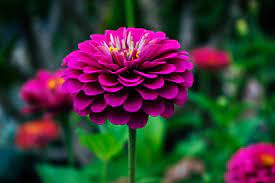

In [5]:
display(Image(FILE_NAME, width = 700, height = 400))

In [6]:
image_array = img.open('download.jpeg')

In [7]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

# Extract Features

In [8]:
inputs = feature_extractor(images = image_array,
                           return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

# Make Predictions

In [9]:
predicted_class_idx = logits.argmax(-1).item()

In [10]:
print(predicted_class_idx)

738


In [11]:
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: pot, flowerpot
